# **Predict UCLA Master Program Admission**
Welcome to the project on classification using neural networks. We will work with the UCLA application dataset for this project.

### **Context:**

The world is developing rapidly and continuously looking for the best knowledge and experience among people. This motivates people all around the world to stand out in their jobs and look for higher degrees that can help them in improving their skills and knowledge. As a result, the number of students applying for Master's programs has increased substantially.

The current admission dataset was created for the prediction of admissions into the University of California, Los Angeles (UCLA). It was built to help students in shortlisting universities based on their profiles. The predicted output gives them a fair idea about their chances of getting accepted.

### **Objective:**

Build a classification model using neural networks to predict the chance of admission.

### **Data Dictionary:**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are : 

**GRE Scores:** (out of 340) \
**TOEFL Scores:** (out of 120) \
**University Rating:**  It indicates the Bachelor University ranking (out of 5) \
**Statement of Purpose Strength:** (out of 5) \
**Letter of Recommendation Strength:** (out of 5) \
**Undergraduate GPA:** (out of 10) \
**Research Experience:** (either 0 or 1) \
**Chance of Admit:** (ranging from 0 to 1) \

### **Loading the libraries and the dataset**

First, let's import the data into the drive so that Colab can access the dataset. One way to load the data In Colab is by mounting the drive. into the drive from your local system is to use the following code.
Once you run the cell, it would ask you to choose the file from your local system.

In [2]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Now, let's load the data using the read_csv() function. One small change from Jupyter here is that the path of the file might be a bit different. 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Admission Prediction/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- Target variable is **Chance of Admit**
- Convert target variable to categorical variable using 80% threshold to make this a classification task
- Assume that if **Chance of Admit** is more than 80% then **Admit** would be 1 (i.e. yes) otherwise it would be 0 (i.e. no)

In [5]:
#Converting the target variable into a categorical variable
data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)

Remove **Chance of Admit** column from the dataset. Remove **Serial No.** column as it adds no additional value to the analysis.

In [6]:
#Dropping columns
data = data.drop(['Serial No.', 'Chance of Admit '], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


Check data info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit              500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


**Observations:**

- **500 observations and 8 columns** in the data
- The columns are all of **numeric data** type
- **No missing values** in the data

Check the summary statistics of the data

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
Admit,500.0,0.28400,0.451388,0.0,0.0000,0.00,1.00,1.00


**Observations:**

- Average GRE score is ~316 out of 340. Some students scored 100% on GRE. 
- Average TOEFL score is ~107 out of 120. Some students scored 100% on TOEFL.
- Students are from school with various ratings, ranging from 1 to 5.
- Average CGPA is 8.57.
- Majority of students (~56%) have research experience.
- As per our assumption, on average 28.4% of students would get admission to UCLA.

### **Visualize the dataset**

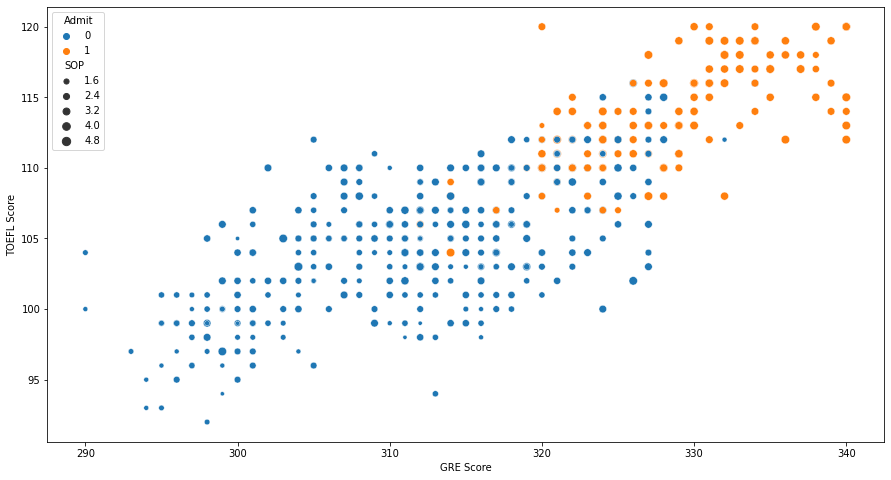

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, 
           x='GRE Score', 
           y='TOEFL Score', 
           hue='Admit',
           size='SOP');

**Observations:** 

- There is a linear relationship between GRE and TOEFL scores. This implies that students scoring high one of them would score high in the other as well.
- With the increase in GRE and TOEFL scores, the strength of SOP increases. 
- Majority of students who were admitted have GRE score greater than 320, TOEFL score greater than 105, and SOP of 4 or higher.

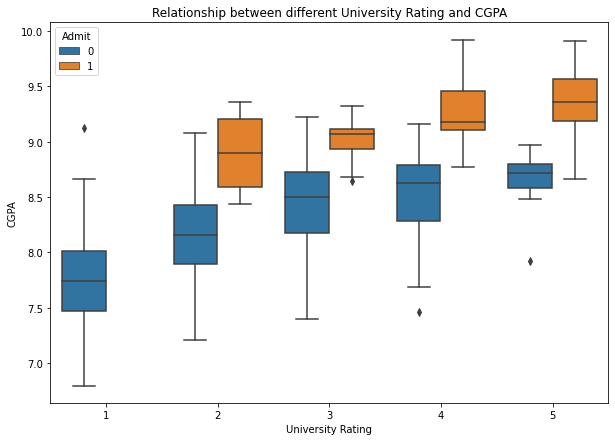

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,
             x='University Rating', 
             y='CGPA',
             hue='Admit')
plt.title('Relationship between different University Rating and CGPA')
plt.show()

**Observations:** 

- With increasing university ratings, the CGPA is also increasing, and also the chances of getting admitted to UCLA increases.
- Students got admitted to UCLA Master program have tend to have higher CGPA than those who did not. 

### **Data Preparation**

This dataset contains both numerical and categorical variables. Treat the dataset first before passing them onto the neural network. Perform below pre-processing steps:
*   One hot encoding of categorical variables
*   Scaling numerical variables

An important point to remember: 
Before scaling numerical variables, first split the dataset into train and test datasets and perform scaling separately to prevent **data leakage**.

Although the variable **University Rating** is encoded as a numerical variable, it signifies the quality of the university. Therefore, it is considered as a categorical variable. Creating one-hot encoding for this variable.

In [11]:
#Creating one hot encoding for the column - University Rating and then dropping University Rating
one_hot_data = pd.concat([data, pd.get_dummies(data['University Rating'], prefix = 'University Rating')], axis=1)
one_hot_data = one_hot_data.drop(columns = 'University Rating')
one_hot_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,4.5,4.5,9.65,1,1,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0,0,1,0,0,0


Split the dataset into train and test datasets:
- Extract all **independent variables** and save them to a variable **features**. 
- Save target variable **Admit** to a variable **target**. 
- These two variables will be used to split the parent dataset into train and test datasets.

In [12]:
features = one_hot_data.drop(['Admit'], axis=1)
target = one_hot_data['Admit']

Dplit the data into an 80:20 ratio becasue the dataset size is small and Keras implementation provides an argument for selecting some percentage of training data as validation data to check model accuracy

In [13]:
#Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

Scale the numerical variables separately for train and test sets:
- Perform **fit** and **transform** on the train data
- Perform **transform** only on the test data. 

In [14]:
scaler = MinMaxScaler()
# here we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [15]:
X_test_normalized = scaler.transform(X_test)

### **Model Architecture**

Some hyper-parameters to play around with and tune the network to get the best results:
1.   Number of hidden layers
2.   Number of neurons in each hidden layer
3.   Activation functions in hidden layers
4.   Optimizers
5.   Random initialization of weights and biases
6.   Batch size
7.   Learning rate
8.   Early stopping
9.   L1 and L2 Regularization
10.  Dropout
11.  Momentum

and so on...

Set the seed for random number generators in NumPy, Python so TensorFlow can reproduce the same results everytime we run the code.

In [16]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Build a feed forward neural network with 2 hidden layers and the output layer.

In [17]:
# we will be adding the layers sequentially
model_1 = Sequential()

# first hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(11,)))

# we will be switching 20% of neurons randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# we will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

After creating the model architecture, compile the model, with the following configuraitons: 
- loss function to optimize, 
- optimization algorithm, &
- evaluation metric

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of 
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl

Try **adamax** optimizer with **accuracy** as the metric and see the model's summary first.

In [18]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


This architecture will train a total of **9,857** parameters i.e. weights and biases in the network.

### **Training the model**

Let's now train the model using the below piece of code. We will keep the 10% of the training data for validation.

In [19]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
12/12 - 4s - loss: 0.6373 - accuracy: 0.7250 - val_loss: 0.6509 - val_accuracy: 0.5750 - 4s/epoch - 308ms/step
Epoch 2/150
12/12 - 0s - loss: 0.5813 - accuracy: 0.7361 - val_loss: 0.6019 - val_accuracy: 0.5750 - 49ms/epoch - 4ms/step
Epoch 3/150
12/12 - 0s - loss: 0.5331 - accuracy: 0.7472 - val_loss: 0.5543 - val_accuracy: 0.7250 - 46ms/epoch - 4ms/step
Epoch 4/150
12/12 - 0s - loss: 0.4897 - accuracy: 0.8167 - val_loss: 0.4976 - val_accuracy: 0.8500 - 51ms/epoch - 4ms/step
Epoch 5/150
12/12 - 0s - loss: 0.4477 - accuracy: 0.8528 - val_loss: 0.4505 - val_accuracy: 0.9250 - 48ms/epoch - 4ms/step
Epoch 6/150
12/12 - 0s - loss: 0.4192 - accuracy: 0.8583 - val_loss: 0.4132 - val_accuracy: 0.9000 - 46ms/epoch - 4ms/step
Epoch 7/150
12/12 - 0s - loss: 0.3946 - accuracy: 0.8556 - val_loss: 0.3775 - val_accuracy: 0.9000 - 47ms/epoch - 4ms/step
Epoch 8/150
12/12 - 0s - loss: 0.3690 - accuracy: 0.8556 - val_loss: 0.3548 - val_accuracy: 0.9000 - 45ms/epoch - 4ms/step
Epoch 9/150
12/1

In [20]:
history_1.history

{'accuracy': [0.7250000238418579,
  0.7361111044883728,
  0.7472222447395325,
  0.8166666626930237,
  0.8527777791023254,
  0.8583333492279053,
  0.855555534362793,
  0.855555534362793,
  0.8694444298744202,
  0.8666666746139526,
  0.8694444298744202,
  0.8722222447395325,
  0.8722222447395325,
  0.8722222447395325,
  0.8722222447395325,
  0.875,
  0.8722222447395325,
  0.8805555701255798,
  0.8777777552604675,
  0.8722222447395325,
  0.8805555701255798,
  0.8888888955116272,
  0.8833333253860474,
  0.8805555701255798,
  0.8833333253860474,
  0.8861111402511597,
  0.8861111402511597,
  0.8916666507720947,
  0.8999999761581421,
  0.8916666507720947,
  0.8888888955116272,
  0.8916666507720947,
  0.8861111402511597,
  0.8833333253860474,
  0.8999999761581421,
  0.8999999761581421,
  0.894444465637207,
  0.8861111402511597,
  0.8805555701255798,
  0.8861111402511597,
  0.8916666507720947,
  0.8916666507720947,
  0.8999999761581421,
  0.894444465637207,
  0.8861111402511597,
  0.90277779102

### **Plotting Accuracy vs Epoch Curve**

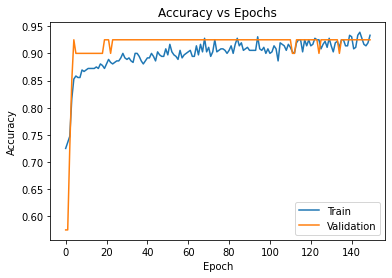

In [21]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in epochs.
- The validation accuracy is constant between ~20 to 100 epochs and it is fluctuating a bit post 100 epochs.
- The model is giving good accuracy. After 150 epochs, the accuracy of the model on the training data is about 93.3% and the validation accuracy is 92.5%.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.

Try increasing model complexity by tuning hyper-parameters mentioned earlier and check if the model performance is improved, Try changing the number of hidden layers, the number of neurons in each hidden layer, the activation function in the hidden layer, the optimizer from **adamax** to **adam**. Try less number of epochs which would also reduce the computation time. 

Clear the previous model's history from the session. 
Fix the seed again after clearing the backend.

In [22]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [23]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [24]:
model_2 = Sequential()

model_2.add(Dense(128, activation='tanh', input_shape=(11,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [25]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [28]:
#Implementing callbacks for early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [32]:
%time history_2 = model_2.fit(X_train_normalized, y_train, callbacks=callbacks, validation_split=0.1, epochs=150, verbose=2)


Epoch 1/150
12/12 - 1s - loss: 0.5653 - accuracy: 0.7417 - val_loss: 0.4820 - val_accuracy: 0.9000 - 821ms/epoch - 68ms/step
Epoch 2/150
12/12 - 0s - loss: 0.4055 - accuracy: 0.8528 - val_loss: 0.3655 - val_accuracy: 0.9000 - 72ms/epoch - 6ms/step
Epoch 3/150
12/12 - 0s - loss: 0.3364 - accuracy: 0.8639 - val_loss: 0.3124 - val_accuracy: 0.9000 - 86ms/epoch - 7ms/step
Epoch 4/150
12/12 - 0s - loss: 0.3235 - accuracy: 0.8639 - val_loss: 0.2959 - val_accuracy: 0.9000 - 76ms/epoch - 6ms/step
Epoch 5/150
12/12 - 0s - loss: 0.3147 - accuracy: 0.8722 - val_loss: 0.2880 - val_accuracy: 0.9000 - 75ms/epoch - 6ms/step
Epoch 6/150
12/12 - 0s - loss: 0.3081 - accuracy: 0.8694 - val_loss: 0.2873 - val_accuracy: 0.9000 - 84ms/epoch - 7ms/step
Epoch 7/150
12/12 - 0s - loss: 0.2891 - accuracy: 0.8722 - val_loss: 0.2945 - val_accuracy: 0.9250 - 52ms/epoch - 4ms/step
Epoch 8/150
12/12 - 0s - loss: 0.2691 - accuracy: 0.8694 - val_loss: 0.2701 - val_accuracy: 0.9250 - 77ms/epoch - 6ms/step
Epoch 9/150
12

In [35]:
%time history_2 = model_2.fit(X_train_normalized, y_train, validation_split=0.1, epochs=100, verbose=2)

Epoch 1/100
12/12 - 0s - loss: 0.1770 - accuracy: 0.9111 - val_loss: 0.2432 - val_accuracy: 0.9250 - 187ms/epoch - 16ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1687 - accuracy: 0.9250 - val_loss: 0.2417 - val_accuracy: 0.9250 - 53ms/epoch - 4ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1598 - accuracy: 0.9222 - val_loss: 0.2277 - val_accuracy: 0.9000 - 56ms/epoch - 5ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1724 - accuracy: 0.9194 - val_loss: 0.2137 - val_accuracy: 0.9500 - 54ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.1722 - accuracy: 0.9222 - val_loss: 0.2177 - val_accuracy: 0.9500 - 55ms/epoch - 5ms/step
Epoch 6/100
12/12 - 0s - loss: 0.1559 - accuracy: 0.9278 - val_loss: 0.2155 - val_accuracy: 0.9250 - 51ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.1626 - accuracy: 0.9306 - val_loss: 0.2383 - val_accuracy: 0.9250 - 53ms/epoch - 4ms/step
Epoch 8/100
12/12 - 0s - loss: 0.1563 - accuracy: 0.9278 - val_loss: 0.2272 - val_accuracy: 0.9250 - 48ms/epoch - 4ms/step
Epoch 9/100
12

**Observation:**
- Early stopping resulted in a model with poorer performance and perhaps should be avoided here as the computational time is negligible here.

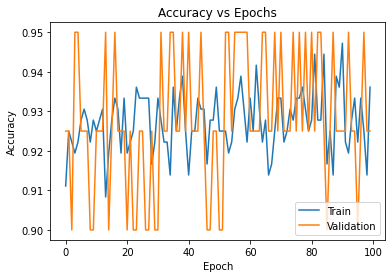

In [36]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations** 

- The model performance on the training data is improved- accuracy has increased by only ~0.3% but the validation accuracy is has increased by 2.5%.
- The validation accuracy is higher than the training accuracy. This might due to the small size of the validation set and the model is able is to correctly classify the data points in the validation set.

Try tuning some of the hyper-parameters furtherr and check if the model performance can be improved.

Use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_3 = Sequential()

model_3.add(Dense(256, activation='tanh', input_shape=(11,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

- Notice that the number of trainable parameters has increased substantially as compared to previous models.

In [ ]:
history_3 = model_3.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=200,
                    verbose=2)

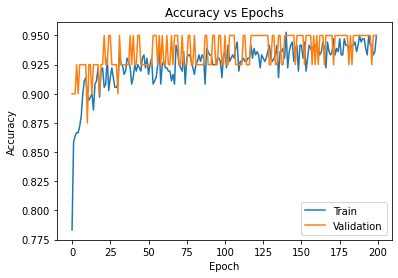

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

- This model is giving a generalized performance with 95% accuracy on the train as well as validation data.
- The validation accuracy is the same as the previous model but the training accuracy has increased by ~1.4%.
- One reason for the algorithm not being able to reach higher than 95% even for training data might be due to the optimizer being stuck at some local minima.
- One way to resolve that is to further tune the model with some other hyper-parameters.
- Among all three models, model 3 has given the best performance. Let's check its performance on the test data.

### **Model evaluation on the test data**

In [ ]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

4/4 [==============================] - 0s 6ms/step - loss: 0.1051 - accuracy: 0.9500


The test accuracy is also coming out to be 95% which implies that our model is able to replicate the performance from the train and validation data on the test (unseen) data.

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.92      0.89      0.91        27

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100



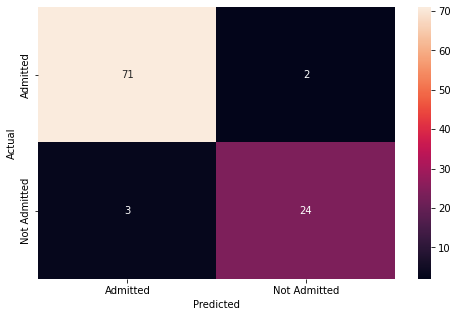

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Admitted', 'Not Admitted'], yticklabels=['Admitted', 'Not Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- The confusion matrix shows that the model can identify the majority of students who would get admission and who won't get admission into UCLA.
- The classification report shows that all the metrics except recall for class 1 are above 90% which is good.

### **Conclusion**

- Build a feed-forward neural network for a classification task using Keras. 
- Different hyper-parameters affect the network. 
- Final model achives test accuracy of 95%. 